In [38]:
# import necessary packages
from plotnine import *
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


# Together

Let's build a few graphs together!

- show how high blood pressure and age are related
- what is the distribution of platelet counts?
- how many of our participants have a serum sodium > 130?

In [39]:
# data from: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart_failure_clinical_records_dataset.csv")

heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


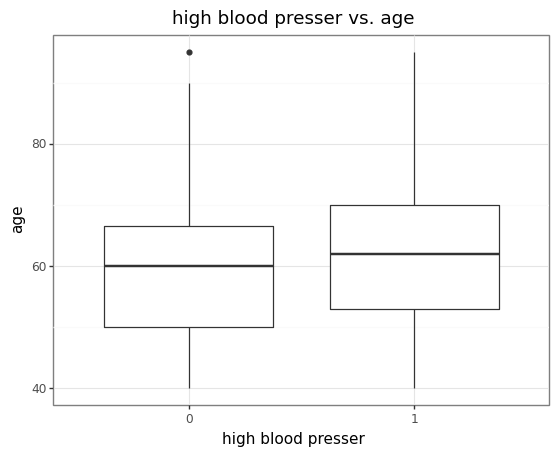

<ggplot: (135742422905)>

In [40]:
# plotting blood presser vs. age in a box plot will a black and white theme
(ggplot(heart, aes(x = "factor(high_blood_pressure)", y = "age")) + geom_boxplot() + theme_bw() 
 + ggtitle("high blood presser vs. age") + labs( x = "high blood presser", y = "age"))

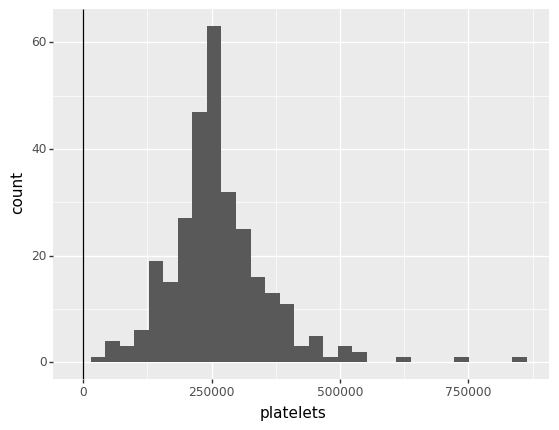

<ggplot: (135743583814)>

In [41]:
# histogram of the amount of platelets with a line at the intercept 

(ggplot(heart, aes(x = "platelets")) + geom_histogram() + geom_vline(xintercept = 130))

#ggplot(heart, aes("platelets")) + geom_histogram() + geom_vline(xintercept = 130)

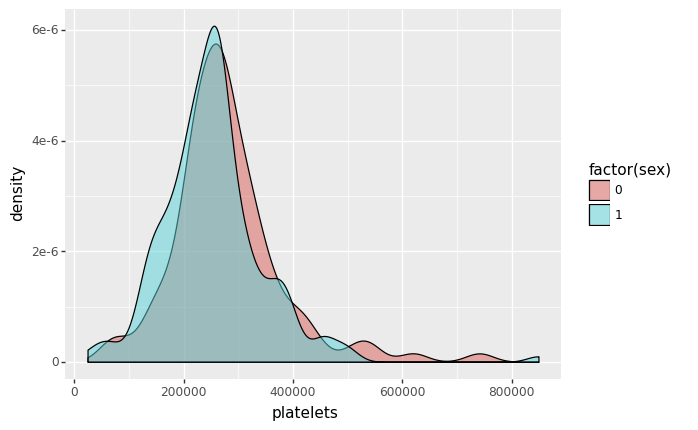

<ggplot: (135741018305)>

In [42]:
# density plot of platelets vs. sex 
(ggplot(heart, aes(x = "platelets", group = "sex", fill = "factor(sex)")) + geom_density(alpha = 0.5))

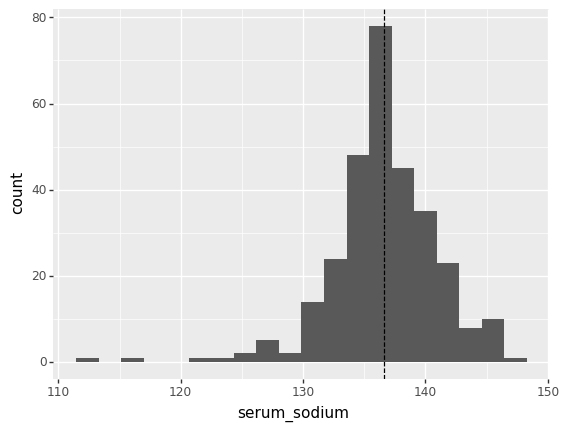

<ggplot: (135742238597)>

In [43]:
# histogram of serum sodium with line at mean
(ggplot(heart, aes(x = "serum_sodium")) 
 + geom_histogram() 
 + geom_vline(xintercept = np.mean(heart["serum_sodium"]), linetype = "dashed"))

In [44]:
print(sum(heart["serum_sodium"] > 130)/heart.shape[0])
print(np.mean(heart["serum_sodium"] > 130))

0.9264214046822743
0.9264214046822743


# In Your Groups
1. Load the necessary libraries (pandas, plotnine)

In [51]:
### YOUR CODE HERE ###
import pandas as pd
import plotnine as pl

2. Load the following dataset `Fifa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/players_15.csv")`. For more info check out [this link.](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset/version/1#)

In [54]:
fifa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/players_15.csv")

# get month of date of birth
fifa["monthBorn"] = fifa["dob"].str.extract(r'-([0-9][0-9])-')
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,monthBorn
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,06
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,02
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,01
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,10
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03


3. How old is the average player in FIFA20? Use plotnine/ggplot to plot a histogram of their ages.



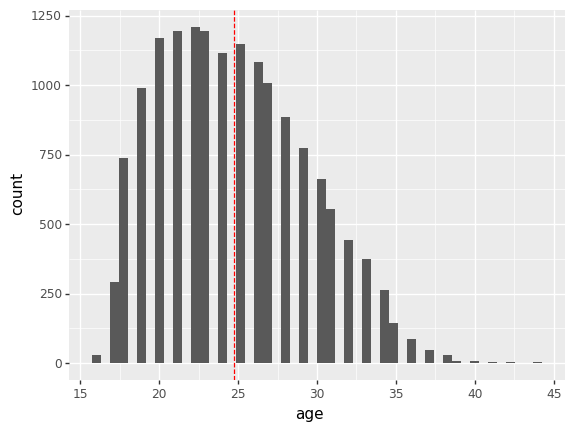

<ggplot: (135743817882)>

In [58]:
(ggplot(fifa, aes(x = "age")) + geom_histogram() + geom_vline(xintercept = np.mean(fifa["age"]), linetype = "dashed", color = "red")
)

4. Do right footed players weigh more than left footed players? Use ggplot/plotnine to make a graph to answer this question.


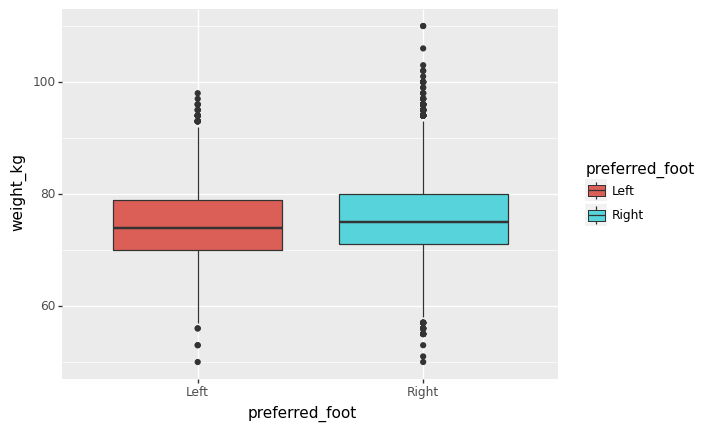

<ggplot: (135742370901)>

In [61]:

(ggplot(fifa, aes(x = "preferred_foot", y = "weight_kg", fill = "preferred_foot")) + geom_boxplot()
)

5. Is there a difference in height between the clubs Chelsea and Manchester United? Use ggplot/plotnine to make a graph to answer this question.



In [71]:
CHMU = (fifa["club"] == "Chelsea")| (fifa["club"] == "Manchester United")
CHMUdf = fifa.loc[CHMU]
CHMUdf.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,monthBorn
6,183277,https://sofifa.com/player/183277/eden-hazard/1...,E. Hazard,Eden Hazard,23,1991-01-07,173,74,Belgium,Chelsea,...,64+2,64+2,64+2,62+2,54+2,46+2,46+2,46+2,54+2,01
7,7826,https://sofifa.com/player/7826/robin-van-persi...,R. van Persie,Robin van Persie,30,1983-08-06,187,71,Netherlands,Manchester United,...,63+3,63+3,63+3,60+3,54+3,48+3,48+3,48+3,54+3,08
10,167397,https://sofifa.com/player/167397/radamel-falca...,Falcao,Radamel Falcao García Zárate,28,1986-02-10,177,72,Colombia,Manchester United,...,60+2,60+2,60+2,58+2,56+2,55+2,55+2,55+2,56+2,02
20,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,22,1992-05-11,199,88,Belgium,Chelsea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05
22,183898,https://sofifa.com/player/183898/angel-di-mari...,A. Di María,Ángel Fabián Di María Hernández,26,1988-02-14,180,70,Argentina,Manchester United,...,73+2,73+2,73+2,75+2,70+2,64+2,64+2,64+2,70+2,02


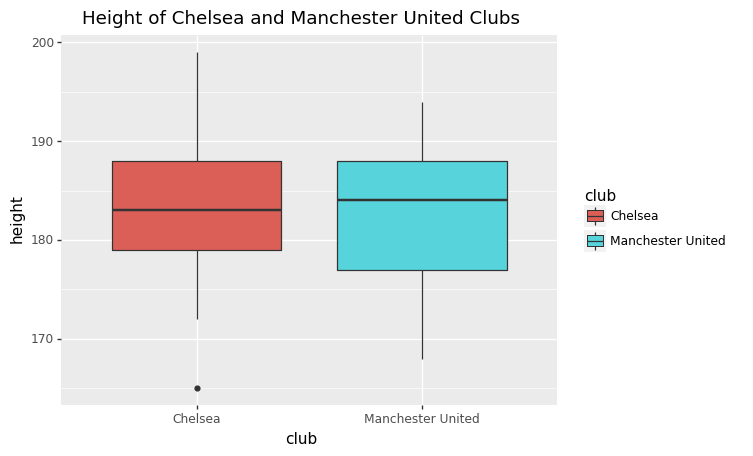

<ggplot: (135746119671)>

In [80]:
(ggplot(CHMUdf, aes(x ="club", y="height_cm", fill = "club")) + geom_boxplot() 
 + ggtitle("Height of Chelsea and Manchester United Clubs") + labs(y = "height")
)

6. Is there a difference in the relationship between height and weight for people born in each of the 12 months? Use ggplot/plotnine to make a graph to answer this question. (see code below on how to extract the month from the column `fifa[dob]`) 

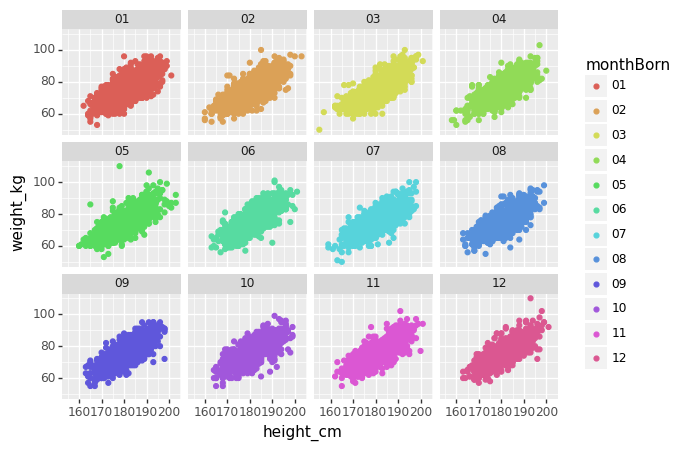

<ggplot: (135743777160)>

In [83]:
(ggplot(fifa, aes(x = "height_cm", y = "weight_kg", color = "monthBorn")) + geom_point() + facet_wrap("~monthBorn")
)

7. Is there an averaged difference between players with different `body_type`s? Use ggplot/plotnine to make a graph to answer this question. Discuss what kind of plot would best communicate this information in your opinion.

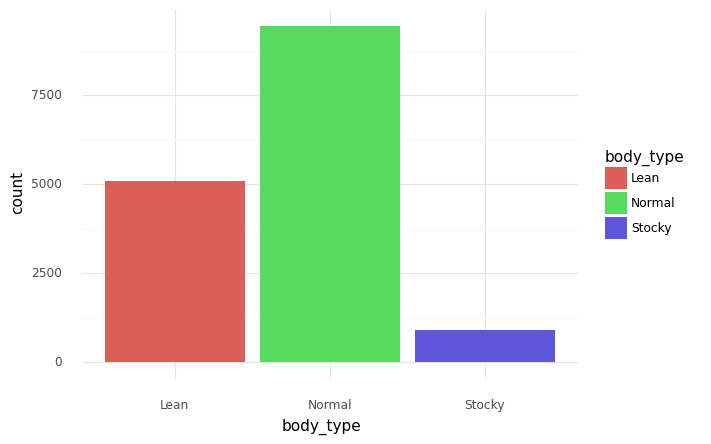

<ggplot: (135745085344)>

In [87]:
(ggplot(fifa, aes(x = "body_type", fill = "body_type")) + geom_bar() + theme_minimal()
)

8. Calculate a new column `bmi` for the fifa dataset. The formula for BMI is below. Note: Body Mass Index (BMI) is not a universal metric of health, and should NOT be taken as such. Use ggplot/plotnine to plot a histogram of the different BMIs in the dataset. Add a dashed line using `+ geom_vline(xintercept = mean, linetype = "dashed", size = 3)` where mean is the mean BMI for the whole dataset.

$$ BMI = \frac{weight(kg)}{height(m)^2}$$



In [94]:
bmi = fifa["weight_kg"]/((fifa["height_cm"]/10)**2)
bmi
fifa["bmi"] = bmi
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,monthBorn,bmi
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,06,0.234586
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,02,0.233747
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,01,0.246914
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,10,0.249836
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,0.246986


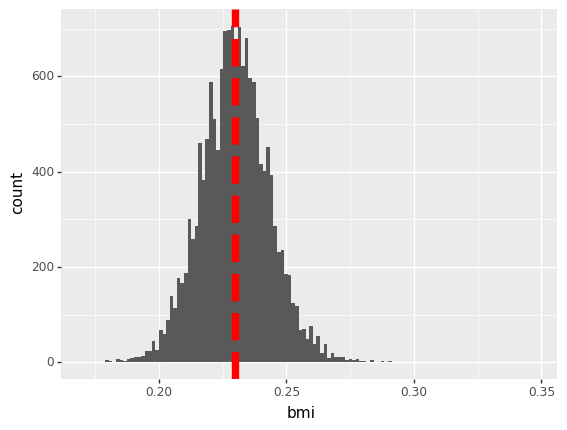

<ggplot: (135742238510)>

In [97]:
(ggplot(fifa, aes("bmi")) + geom_histogram() 
 + geom_vline(xintercept = np.mean(fifa["bmi"]), linetype = "dashed", size = 3, color = "red")
)

9. What is the relationship between height and weight for each `body_type`? Use `facet_wrap()` to make a separate height/weight scatterplot for each body type.

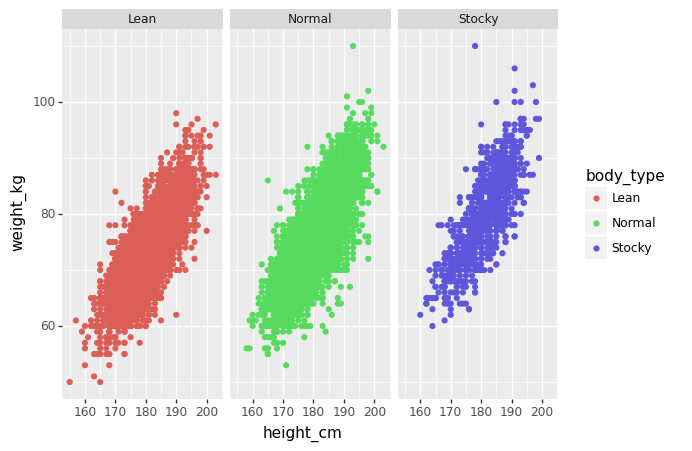

<ggplot: (135743788641)>

In [99]:
(ggplot(fifa, aes(x = "height_cm", y = "weight_kg", color = "body_type")) + geom_point() + facet_wrap("~body_type")
)

10. Is there an association between jersey number and age?  Use ggplot/plotnine to make a graph to answer this question.

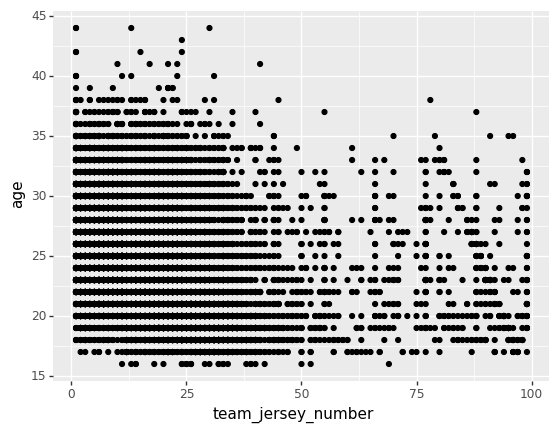

<ggplot: (135744866681)>

In [101]:
(ggplot(fifa, aes(x = "team_jersey_number", y = "age")) + geom_point()
)

11. Let's use your CPSC230 skills, create a column in `fifa` called `name_len` that counts the number of characters in each player's `long_name` (spaces shouldn't count). Then use ggplot/plotnine to create a histogram of `name_len` and add `+theme_minimal()` to your graph. What is the typical range of name length?

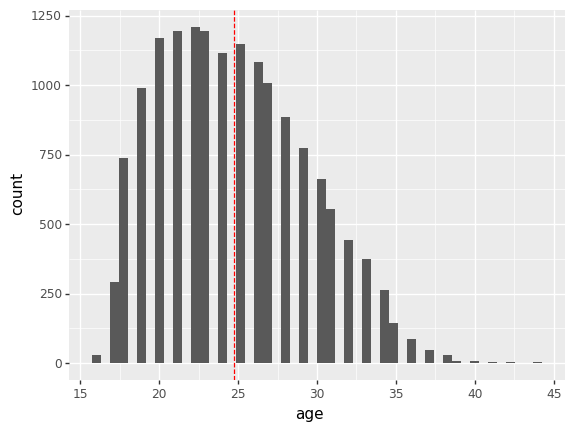

<ggplot: (135741015300)>

In [46]:
ggplot(fifa, aes("age")) + geom_histogram() + geom_vline(xintercept = np.mean(fifa['age']), linetype = "dashed", color = 'red')

In [47]:
avgPlayerAge = np.mean(fifa['age'])
avgPlayerAge

24.763271904300034

In [49]:
rightFootPlayers = fifa

In [50]:
Chelsea= fifa['club'] == 'Chelsea'
MU = fifa['club'] == 'Manchester United'
ChelseaDF = fifa[Chelsea or MU]
ChelseaDF

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
MU = fifa['club'] == 'Manchester United'
MDDF = fifa[MU]
#MDDF['height_cm']
MDDF

In [ ]:
#(ggplot(fifa, aes(x = "club", y = "age")) + geom_boxplot() + theme_bw())